# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tobigs/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
# 테스트 데이터에 학습한 스케일을 적용하는 과정
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수 - 3개
N = len(X_train.loc[0])

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.41298286, 0.54773684, 0.55472985])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = A\cdot B = \sum_{i=1}^{n} A_i \cdot B_i$

In [ ]:
def dot_product(X, parameters):
    z = np.dot(X, parameters)
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-z}}$

In [ ]:
def logistic(X, parameters):
    z = np.dot(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [ ]:
#label 1에 속할 듯?
logistic(X_train.iloc[1], parameters)

0.747769050867652

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] \$

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [ ]:
def mse_i(X, y, parameters):
    # 모델의 예측값 계산
    prediction = np.dot(X, parameters.T)

    # 평균 제곱 오차 손실 계산
    loss = (prediction - y) ** 2 / 2
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0

    for i in range(X_set.shape[0]):
        X = X_set.iloc[i, :]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)

    loss = loss/n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

0.8265556602087335

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1091058702904792

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\ \sum_{i=1}^{n} (h_\theta(x_{i}) - y_{i}) \cdot x_{ij}
$
## ${\partial\over{\partial \theta_j}}l(p)=-\ \sum_{i=1}^{n} (p_i- y_i) \cdot x_{ij}
$

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

0.21012891059287242

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

0.09949900909773426

In [ ]:
from IPython.display import Image

#Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    n = len(X_set)
    for i in range(n):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[-19.947428504259292, -125.84782483885841, -158.24984588471173]

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[-44.983288266890646, -11.61646866680694, -43.141370033911095]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_idx 함수는 주어진 배치 크기로 훈련 데이터를 나누어 각 배치의 인덱스를 리스트로 반환한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n

    parameters -= gradients
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.41598174, 0.54851127, 0.55760594])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 모델의 매개변수를 업데이트할 때 얼마나 큰 보폭으로 업데이트할지 결정
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 모델이 학습하는 동안에 사용되는 데이터의 일부분
- epoch: 전체 훈련 데이터셋을 한 번 모델에 입력한 것
- num_epoch: 학습을 몇 번 반복할지 결정하는 하이퍼파라미터
<br>

BGD: 배치 경사 하강법
SGD: 확률적 경사 하강법
MGD: 미니 배치 경사 하강법
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))


            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.8958715454378396  params: [0.27564241 0.27717926 0.71350003]  gradients: [-0.026979267232323863, -0.004751043722597094, -0.028156842923819245]
epoch: 100  loss: 4.075155266960215  params: [4.34063007 1.48652394 4.36660738]  gradients: [-0.04709132236237466, -0.01302596939636433, -0.03786422732735205]
epoch: 200  loss: 8.022562666633407  params: [9.28435573 2.65957535 8.06012301]  gradients: [-0.05118820362123492, -0.010477897851755997, -0.03593924817552519]


<ipython-input-14-d9d76d9ffa00>:3: RuntimeWarning: divide by zero encountered in log
  loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-29-0983aec4334f>:22: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_loss - loss) < tolerance:
<ipython-input-14-d9d76d9ffa00>:3: RuntimeWarning: invalid value encountered in double_scalars
  loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))


epoch: 300  loss: nan  params: [14.56260477  3.55997163 11.52515217]  gradients: [-0.0544551199737675, -0.0073899205086273905, -0.03319831270500164]
epoch: 400  loss: nan  params: [20.19752605  4.11223186 14.66277486]  gradients: [-0.058220654022395464, -0.003690918001617218, -0.0294818917012369]
epoch: 500  loss: nan  params: [26.20062292  4.30639891 17.40781538]  gradients: [-0.06172973762620495, -0.00023658223305975522, -0.025463271350230753]
epoch: 600  loss: nan  params: [32.53763428  4.14302928 19.74506267]  gradients: [-0.06519421478679281, 0.0038272130073955884, -0.020931240465805176]
epoch: 700  loss: nan  params: [39.28150769  3.49029405 21.51462822]  gradients: [-0.06908242850080207, 0.008463379306166157, -0.015256883934324525]
epoch: 800  loss: nan  params: [46.22519424  2.60370977 22.98111983]  gradients: [-0.06990831553240402, 0.00938075614976734, -0.013788856671124875]
epoch: 900  loss: nan  params: [53.27623163  1.60148882 24.24407664]  gradients: [-0.07090014364093976,

array([60.337136  ,  0.50780773, 25.32550992])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 11.751609221278322  params: [5.53074751 3.14480889 6.40918869]  gradients: [-0.09999905782809129, -0.05441958291595492, -0.07035841127552568]


array([6.99664351, 3.55647662, 7.54939792])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 2.7524164052346296  params: [1.12351047 0.99176091 1.22895558]  gradients: [-0.07479252629185186, -0.06537081877592534, -0.08115606557836341]


<ipython-input-14-d9d76d9ffa00>:3: RuntimeWarning: divide by zero encountered in log
  loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-29-0983aec4334f>:22: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_loss - loss) < tolerance:
<ipython-input-14-d9d76d9ffa00>:3: RuntimeWarning: invalid value encountered in double_scalars
  loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))


epoch: 100  loss: nan  params: [50.60221472 18.98794054 42.94376265]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 200  loss: nan  params: [101.50098385  36.15419207  84.09471143]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 300  loss: nan  params: [152.44780125  53.26763221 125.21051622]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 400  loss: nan  params: [203.49505755  70.26233334 166.25299518]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 500  loss: nan  params: [254.83394842  86.91842075 207.07980352]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 600  loss: nan  params: [306.68126755 103.07725274 247.49084155]  gradients: [-0.08333333333333333, -0.06969778727353913, -0.08501721463290737]
epoch: 700  loss: nan  params: [358.74380931 119.08105556 287.70217718]  gradients: [-0.083333333

array([514.49292886, 166.87755464, 407.85500519])

### Predict Label

In [ ]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[ 0, 40],
       [ 0, 10]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.2


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.365851  , 2.89601343])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 1.7410576263904571  params: [-0.35826067 -0.17890462]  gradients: [0.14915955647125811, 0.07069463550468366]
epoch: 100  loss: 5.570460414124566e+103  params: [-8.77175207e+51 -4.54744840e+51]  gradients: [9.37678061964393e+50, 3.885884922044221e+50]
epoch: 200  loss: 1.2629446945424008e+207  params: [-4.17669698e+103 -2.16528167e+103]  gradients: [4.464783202295754e+102, 1.850276169376373e+102]


<ipython-input-16-eb3731dfbfee>:7: RuntimeWarning: overflow encountered in double_scalars
  loss += loss_function(X, y, parameters)
<ipython-input-29-0983aec4334f>:22: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_loss - loss) < tolerance:
<ipython-input-15-82a7760bfa72>:6: RuntimeWarning: overflow encountered in double_scalars
  loss = (prediction - y) ** 2 / 2


epoch: 300  loss: inf  params: [-1.98874723e+155 -1.03100559e+155]  gradients: [2.1259203827101253e+154, 8.81014742238201e+153]
epoch: 400  loss: inf  params: [-9.46948170e+206 -4.90916512e+206]  gradients: [1.0122635901556113e+206, 4.1949790463045005e+205]
epoch: 500  loss: inf  params: [-4.50892311e+258 -2.33751421e+258]  gradients: [4.819924510288892e+257, 1.9974522962268277e+257]


<ipython-input-23-0e52828950e2>:8: RuntimeWarning: overflow encountered in double_scalars
  gradients[j] += get_gradient_ij(X, y, parameters, j, model)


epoch: 600  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 700  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 800  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 900  loss: inf  params: [-inf -inf]  gradients: [inf, inf]


array([-inf, -inf])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

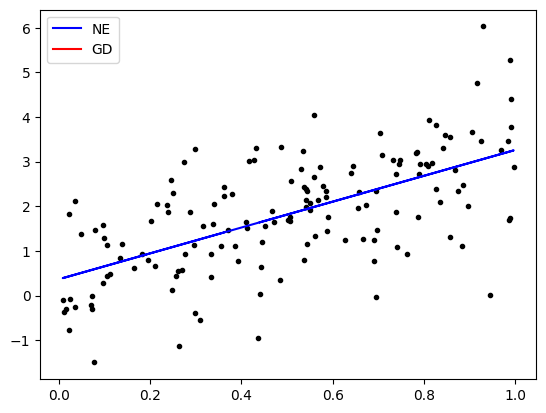

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()